# Six for a Spell Solver

"Six for a Spell", by Will Shortz, appeared in the New York Times special puzzle edition December 18, 2016.

> How many common words of exactly 6 letters can you find?  Words must be spelled sequentially by following the lines connecting circles.  ...  You my use a letter more than once -- but not twice in a row.  Capitalized words are not allowed.  Finding 12 words is good; 22 is excellent; 32 is genius.  Our answer list has 37 words.

In [25]:
%matplotlib inline

## The Dictionary

I'll use `/usr/share/dict/words` which is freely available on Linux systems.

In [5]:
!head -n 9000 /usr/share/dict/words | tail -n 5

Luanda
Luanda's
Luann
Luann's
Lubavitcher


In [6]:
!wc -l /usr/share/dict/words

99171 /usr/share/dict/words


In [18]:
def get_words():
    words = []
    with open('/usr/share/dict/words', 'r') as f:
        for word in f:
            word = word.strip()
            if len(word) == 6 and word == word.lower() and all([c.isalpha() for c in word]):
                words.append(word)
    return words

words = get_words()
words[:5], len(words)

(['abacus', 'abased', 'abases', 'abated', 'abates'], 7237)

## The Graph

The letters and connections are well suited to a graph representation.  We could use simpler data structures, but using NetworkX seems like a nice match.  And it will give me a chance to play with that library a little more.

{node(index=0, letter='c'): <matplotlib.text.Text at 0x7f9ebbc0b748>,
 node(index=1, letter='o'): <matplotlib.text.Text at 0x7f9e81fc65f8>,
 node(index=2, letter='e'): <matplotlib.text.Text at 0x7f9e81b7c898>,
 node(index=3, letter='a'): <matplotlib.text.Text at 0x7f9ebbc0afd0>,
 node(index=4, letter='r'): <matplotlib.text.Text at 0x7f9ebbc1fac8>,
 node(index=5, letter='i'): <matplotlib.text.Text at 0x7f9ebbb90908>,
 node(index=6, letter='d'): <matplotlib.text.Text at 0x7f9ebbc0b128>,
 node(index=7, letter='l'): <matplotlib.text.Text at 0x7f9e822effd0>,
 node(index=8, letter='n'): <matplotlib.text.Text at 0x7f9ebbb90cf8>,
 node(index=9, letter='e'): <matplotlib.text.Text at 0x7f9ebbc0a940>,
 node(index=10, letter='o'): <matplotlib.text.Text at 0x7f9ebbc1fd30>,
 node(index=11, letter='t'): <matplotlib.text.Text at 0x7f9ebbbac4e0>,
 node(index=12, letter='p'): <matplotlib.text.Text at 0x7f9ebbb908d0>}

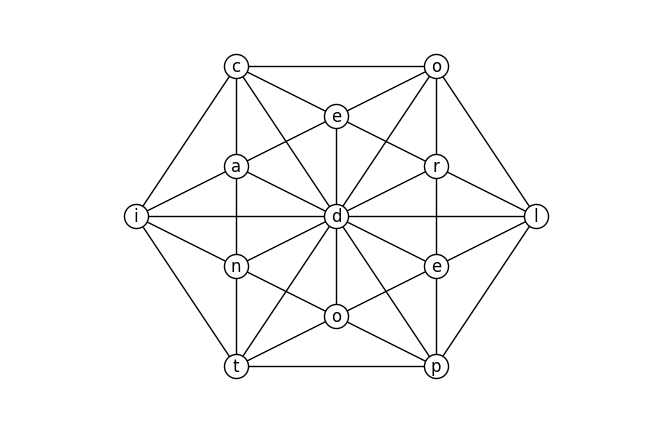

In [54]:
from collections import namedtuple
import networkx as nx

node = namedtuple('node', ['index', 'letter'])

def get_graph():
    G = nx.Graph()
    pos = [
        (1, 6), (3, 6),
        (2, 5),
        (1, 4), (3, 4),
        (0, 3), (2, 3), (4, 3),
        (1, 2), (3, 2),
        (2, 1),        
        (1, 0), (3, 0),
    ]
    nodes = [node(index=i, letter=l) for i, l in enumerate('coearidlneotp')]
    for n, p in zip(nodes, pos):
        G.add_node(n, letter=n.letter, pos=p)
    def get_edges(n0, ns):
        return [(n0, n1) for n1 in ns]
    edges = []
    for n0, ns in [
        (0, (1, 2, 3, 5, 6)),
        (1, (0, 2, 4, 6, 7)),
        (2, (0, 1, 3, 4, 6)),
        (3, (0, 2, 5, 6, 8)),
        (4, (1, 2, 6, 7, 9)),
        (5, (0, 3, 6, 8, 11)),
        (6, (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)),
        (7, (1, 4, 6, 9, 12)),
        (8, (3, 5, 6, 10, 11)),
        (9, (4, 6, 7, 10, 12)),
        (10, (6, 8, 9, 11, 12)),
        (11, (5, 6, 8, 10, 12)),
        (12, (6, 7, 9, 10, 11))
    ]:
        edges.extend(get_edges(n0, ns))
    for (n0, n1) in edges:
        G.add_edge(nodes[n0], nodes[n1])
    return G

G = get_graph()
pos = nx.get_node_attributes(G,'pos')
nx.draw(G, pos=pos, node_color='w',)
nx.draw_networkx_labels(G, pos, labels={g: g.letter for g in G})

## The Search

The idea is to search depth first but abandon the search tree if it is clear that no words are possible down that path.

In [76]:
def search_bfs(G, node, words, max_len=6, prefix=None):
    """Search the graph `G` starting at `node` for any words in `words`"""
    prefix = (prefix or '') + node.letter
    # print('prefix: {}'.format(prefix))
    candidates = []
    for n in G[node]:
        candidate = prefix + n.letter
        if len(candidate) == max_len:
            if candidate in words:
                candidates.append(candidate)
        else:
            candidates.extend(search_bfs(G, n, words, max_len=max_len, prefix=prefix))
    return candidates


def find_words(G, words, max_len=6):
    word_list = []
    for node in G:
        print(node.letter)
        w = search_bfs(G, node, words, max_len=max_len)
        print(w)
        word_list.extend(w)
    print(sorted(set(word_list)))
    print(len(set(word_list)))

find_words(G, words, max_len=6)

l
['lorded', 'lorded']
e
['eroded', 'eroded']
d
['deader', 'deader', 'decade', 'decade', 'decant', 'decide', 'decide', 'decode', 'decode', 'dandle', 'dander', 'dander']
c
['candle', 'candor', 'candid', 'canoed', 'canton', 'cinder', 'cinder', 'cicada', 'corded', 'corded', 'cordon', 'colder', 'colder']
e
['eroded', 'eroded']
a
['adored', 'adored', 'acacia', 'acidic']
t
['tinder', 'tinder']
o
[]
r
['reader', 'reader', 'reread', 'recant', 'recede', 'recede', 'record', 'rococo', 'reread']
p
['pedant', 'people', 'peptic', 'ponder', 'ponder']
n
['notice', 'niacin']
i
[]
o
['ordain']
['acacia', 'acidic', 'adored', 'candid', 'candle', 'candor', 'canoed', 'canton', 'cicada', 'cinder', 'colder', 'corded', 'cordon', 'dander', 'dandle', 'deader', 'decade', 'decant', 'decide', 'decode', 'eroded', 'lorded', 'niacin', 'notice', 'ordain', 'pedant', 'people', 'peptic', 'ponder', 'reader', 'recant', 'recede', 'record', 'reread', 'rococo', 'tinder']
36
